# Module 3 - Classification

## Churn prediction project

For this project we'll use the **[Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)** dataset available in Kaggle

In this case the file has already been downloaded and placed it in this repository

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preparation

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [6]:
df_categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [7]:
for colum in df_categorical_columns:
    df[colum] = df[colum].str.lower().str.replace(' ','_')

In [8]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [9]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

If we take a look at the totalcharges column, it should be a numeric column but it is an object column. 

To try to understand what is happening, we could try to convert it as numeric and see the result

In [10]:
pd.to_numeric(df.totalcharges)

ValueError: Unable to parse string "_" at position 488

Pandas is telling us that there are values that contains "_". This happened when we replaced spaces with underscores.

To solve this we can do the following:

In [11]:
tc = pd.to_numeric(df.totalcharges, errors='coerce') # this will set the errors to NaN

In [12]:
tc.isnull().sum()

11

And now we can see which values are null and do something about it

In [13]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


Now that we identified the problem we can perform the same to the actual column

In [14]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce') # this will set the errors to NaN

In [15]:
# and fill with 0 the null values
df.totalcharges = df.totalcharges.fillna(0)

In [16]:
df.totalcharges.isnull().sum()

0

And now there are no null values and all the values are numeric as we can see:

In [16]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

Finally, lets check our target column **churn**

In [17]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

The values are yes and no. We need this to be 1's and 0's

For this we can do the following trick

In [18]:
df.churn = (df.churn == 'yes').astype(int)

In [19]:
df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

Now we have 1's and 0's values instead of yes and no

## Setting the Validation Framewomrk

We previously calculated the size of the dataframes by doing this:

In [20]:
n = len(df)
n_val = int(len(df) * 0.2)
n_test = int(len(df) * 0.2)
n_train = n - n_val - n_test

n_test, n_val, n_train, (n_test + n_val + n_train), n

(1408, 1408, 4227, 7043, 7043)

Now we are going to use Scikit Learn library to get the same result

In [21]:
from sklearn.model_selection import train_test_split

In [20]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [23]:
len(df_full_train), len(df_test)

(5634, 1409)

In [24]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [25]:
len(df_train), len(df_val)

(4225, 1409)

In [26]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

Now we can create the target vectors

In [27]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

And delete this data from the train, val and test dataframes

In [28]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## EDA (Exploratory Data Analysis)

In [29]:
df_full_train = df_full_train.reset_index(drop=True)

1. First we need to look if there are missing values

In [30]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [30]:
df_full_train.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [31]:
# we can do the same with the option "normalized" to see the actual proportion
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In this case the 0.26 value would be the **"Chun Rate"**

We could also calculate this value by getting the mean value of the churn

In [32]:
df_full_train.churn.mean()

0.26996805111821087

We could call it the **Global Churn Rate**

In [39]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

This means that 27% of the users are churning.

Now lets take a look at the other columns/variables

In [31]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

We want to have two lists of columns:
- Numerical columns
- Categorial columns

In [32]:
# Numerical
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [33]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

We can see the number of unique values on the categorical columns. This will help when we encode these values for training our model

In [34]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## Feature Importance: Churn rate and risk ratio

Feature importance analysis (part of EDA) - help us identify which features actually affect our target variable

- Churn rate
- Risk ratio
- Mutual information

#### **Churn rate**

For this we can see the churn rate within differnt groups

In [35]:
df_full_train.head().T

,0,1,2,3,4
customerid,5442-pptjy,6261-rcvns,2176-osjuv,6161-erdgd,2364-ufrom
gender,male,female,male,male,male
seniorcitizen,0,0,0,0,0
partner,yes,no,yes,yes,no
dependents,yes,no,no,yes,no
tenure,12,42,71,71,30
phoneservice,yes,yes,yes,yes,yes
multiplelines,no,no,yes,yes,no
internetservice,no,dsl,dsl,dsl,dsl
onlinesecurity,no_internet_service,yes,yes,yes,yes


For example we can see the churn rate based on gender

In [36]:
churn_rate_male = df_full_train[df_full_train['gender'] == 'male']['churn'].mean()
print(f'Male churn rate %f' % churn_rate_male)

Male churn rate 0.263214


In [37]:
churn_rate_female = df_full_train[df_full_train['gender'] == 'female']['churn'].mean()
print(f'Female churn rate %f' %churn_rate_female)

Female churn rate 0.276824


The churn rate among females is almost the same, a little more bigger on the female side

In [40]:
global_churn_rate

0.26996805111821087

We can also do the same considering for example the column partner

In [41]:
churn_partner = df_full_train[df_full_train.partner == 'yes']['churn'].mean()
print(f'The churn for people with partner is: %f' % churn_partner)

The churn for people with partner is: 0.205033


In [42]:
churn_no_partner = df_full_train[df_full_train.partner == 'no']['churn'].mean()
print(f'The churn for people with NO partner is: %f' % churn_no_partner)

The churn for people with NO partner is: 0.329809


In this case the churn rate is quite different depending if the client has partner

We can also calculate the difference between the global churn rate and these churn rate

In [43]:
global_churn_rate - churn_partner

0.06493474245795922

In [44]:
global_churn_rate - churn_no_partner

-0.05984095297455855

If we calculate this difference considering the churn rate based on gender, we can see that there difference is really small

In [45]:
global_churn_rate - churn_rate_male

0.006754520462819769

In [46]:
global_churn_rate - churn_rate_female

-0.006855983216553063

So as a result, we can use the difference as a method to evaluate **feature importance**

1. Difference

Global Churn - Group Churn => by group we mean the churn based on an specific column

- if the **difference is > 0** this means that global churn is bigger and then the possibility of churn is **low**
- if the **difference is < 0** this means that group churn is bigger meaning that the possibility of churn is **high**

#### **Risk Ratio**

If we, instead of the difference, we calculate the ratio between the group churn over the global churn we can also evaluate feature importance

Risk = Group / Global

- if **Risk is > 1** it is likely to churn
- if **Risk is < 1** it is less likely to churn

In [47]:
churn_no_partner / global_churn_rate

1.2216593879412643

In [48]:
churn_partner / global_churn_rate

0.7594724924338315

Based on the Difference and Risk Ratio methods to evaluate Feature Importance, we could imagine it as if we were executing the following SQL query:

```
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk

FROM
    data
GROUP BY
    gender
```

And we could do it for each of the features in the dataset. Lets see how we could do this in pandas

In [49]:
for c in categorical:
    print('#######################')
    print(c)
    df_group = df_full_train.groupby(c)['churn'].agg(['mean', 'sum'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    print(df_group)
    print('#######################')
    print()

#######################
gender
            mean  sum      diff      risk
gender                                   
female  0.276824  774  0.006856  1.025396
male    0.263214  747 -0.006755  0.974980
#######################

#######################
seniorcitizen
                   mean   sum      diff      risk
seniorcitizen                                    
0              0.242270  1144 -0.027698  0.897403
1              0.413377   377  0.143409  1.531208
#######################

#######################
partner
             mean  sum      diff      risk
partner                                   
no       0.329809  967  0.059841  1.221659
yes      0.205033  554 -0.064935  0.759472
#######################

#######################
dependents
                mean   sum      diff      risk
dependents                                    
no          0.313760  1245  0.043792  1.162212
yes         0.165666   276 -0.104302  0.613651
#######################

#######################
phoneservice

So far we have analyzed how individual variables can show the possibility, in this case, of a churn.

Now we will see how to compare between variables in order to understand which variables are more important than others

## Feature Importance: Mutual information

Mutual information tell us how much we can learn about one variable if we know the value of another

In [50]:
from sklearn.metrics import mutual_info_score

In [51]:
mutual_info_score(df_full_train.churn, df_full_train.contract) # we use column contract as an example

0.0983203874041556

In [52]:
# if we do the same with another column like gender
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

We can clearly see that contract has a higher score than gender, which means that contract will be more informative when talking about churn compared to gender

We can apply this to all categorical variables to compare them

In [53]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_full_train.churn, series)

In [54]:
mi = df_full_train[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)
mi

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

With this result we can understand which categorical variable have more impact on the target variable.

This is important since when we analyzed individual variables, we saw that for example partner variable could be important, but when compared with the rest we can see it doesn't have a high score

Now we are going to work with analysis for numerical variables

## Feature importance: Correlation

To measure the dependency when talking about numerical variables we work with correlation.

In particular we measure the **Correlation Coeficient**

In [55]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In this result, when we get a negative correlation, means that as the variable increases, the chance of churn decreases.

So, the more months the client has the service (tenure), less likely the client will churn.

## One-hot encoding

We will use Scikit learn to encode categorical values

In [57]:
from sklearn.feature_extraction import DictVectorizer

In [58]:
# lets see a sample one-hot encoding
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [59]:
# now convert it to a dict
df_train[['gender', 'contract']].iloc[:10].to_dict(orient='records')

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [61]:
# now convert it to a dict
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records')
dicts[:5]

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'}]

Now we have a list of dictionaries where each dictionary has two key/value pairs

In [62]:
dv = DictVectorizer(sparse=False) # we dont want to create a sparce matrix, since we actually need all the 1 and 0 values

In [63]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [64]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [65]:
dv.transform(dicts)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

Lets do exactly the same but adding a numerical variable

In [66]:
# now convert it to a dict
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient='records')

In [67]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [68]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male', 'tenure'],
      dtype=object)

In [69]:
dv.transform(dicts)

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1.,  0.,  6.],
       [ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 17.],
       [ 0.,  0.,  1.,  1.,  0., 66.],
       [ 1.,  0.,  0.,  1.,  0.,  2.],
       [ 1.,  0.,  0.,  1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  1.,  0., 71.],
       [ 1.,  0.,  0.,  1.,  0., 32.],
       [ 0.,  1.,  0.,  0.,  1., 53.],
       [ 0.,  0.,  1.,  0.,  1., 56.],
       [ 1.,  0.,  0.,  0.,  1., 61.],
       [ 0.,  1.,  0.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  1.,  0.,  3.],
       [ 1.,  0.,  0.,  0.,  1.,  3.],
       [ 0.,  0.,  1.,  0

So DictVectorizer library understand that tenure variable is numerical and doesn't try to one-hot encode it

Now lets try with all variables

In [70]:
# now convert it to a dict
train_dicts = df_train[categorical + numerical].to_dict(orient='records')

In [71]:
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [72]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [73]:
dv.get_feature_names_out() # -> Now it is a much larger list of columns

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [74]:
dv.transform(train_dicts)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [75]:
# another way to do it with less lines of code would be like this:

X_train = dv.fit_transform(train_dicts) # this is the same as to fit it and then transform it

After this we can move forward with validation data

In [76]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [77]:
X_val = dv.transform(val_dicts)

In [78]:
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

## Logistic Regression

By usign the sigmoid function, it always get values between 0 and 1. This way it helps to stablish a binary classification model

In [79]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [80]:
values = np.linspace(-10, 10, 50)
values

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

In [81]:
sigmoid(values)

array([4.53978687e-05, 6.82792246e-05, 1.02692018e-04, 1.54446212e-04,
       2.32277160e-04, 3.49316192e-04, 5.25297471e-04, 7.89865942e-04,
       1.18752721e-03, 1.78503502e-03, 2.68237328e-03, 4.02898336e-03,
       6.04752187e-03, 9.06814944e-03, 1.35769169e-02, 2.02816018e-02,
       3.01959054e-02, 4.47353464e-02, 6.58005831e-02, 9.57904660e-02,
       1.37437932e-01, 1.93321370e-01, 2.64947903e-01, 3.51547277e-01,
       4.49155938e-01, 5.50844062e-01, 6.48452723e-01, 7.35052097e-01,
       8.06678630e-01, 8.62562068e-01, 9.04209534e-01, 9.34199417e-01,
       9.55264654e-01, 9.69804095e-01, 9.79718398e-01, 9.86423083e-01,
       9.90931851e-01, 9.93952478e-01, 9.95971017e-01, 9.97317627e-01,
       9.98214965e-01, 9.98812473e-01, 9.99210134e-01, 9.99474703e-01,
       9.99650684e-01, 9.99767723e-01, 9.99845554e-01, 9.99897308e-01,
       9.99931721e-01, 9.99954602e-01])

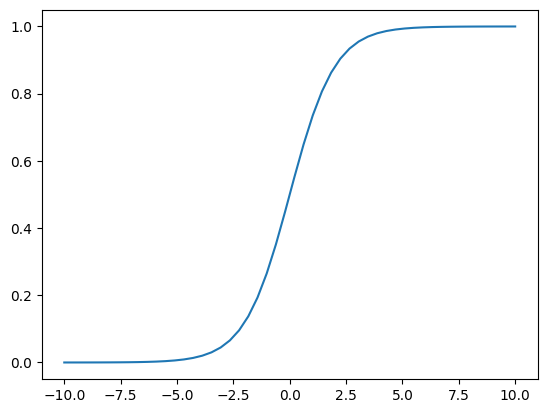

In [82]:
plt.plot(values, sigmoid(values))

## Training Logistic Regression with Scikit Learn

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model = LogisticRegression()

In [85]:
model.fit(X_train, y_train)

LogisticRegression()

In [86]:
model.coef_

array([[ 4.74754796e-01, -1.74870209e-01, -4.07557400e-01,
        -2.96841003e-02, -7.79887136e-02,  6.26793185e-02,
        -8.89617007e-02, -8.13904316e-02, -3.43078286e-02,
        -7.33649853e-02, -3.35216007e-01,  3.16504894e-01,
        -8.89617007e-02,  3.67450457e-03, -2.58125938e-01,
         1.41444625e-01,  9.00849919e-03,  6.25267586e-02,
        -8.89617007e-02, -8.12378717e-02,  2.65580226e-01,
        -8.89617007e-02, -2.84291339e-01, -2.31192220e-01,
         1.23519406e-01, -1.66017520e-01,  5.83447060e-02,
        -8.70089645e-02, -3.20559070e-02,  7.04760226e-02,
        -5.90839650e-02,  1.41444625e-01, -2.49117439e-01,
         2.15474613e-01, -1.20369469e-01, -8.89617007e-02,
         1.01658356e-01, -7.08978220e-02, -8.89617007e-02,
         5.21867089e-02,  2.13371835e-01, -8.89617007e-02,
        -2.32082948e-01, -7.04140286e-02,  3.82463659e-04]])

In [87]:
model.coef_.shape

(1, 45)

In [88]:
model.intercept_

array([-0.10902795])

In [89]:
model.predict(X_train) # This would be a HARD PREDICTION

array([0, 1, 1, ..., 1, 0, 1])

In [90]:
model.predict_proba(X_train) # This would be a SOFT PREDICTION

array([[0.90451195, 0.09548805],
       [0.32066924, 0.67933076],
       [0.36632094, 0.63367906],
       ...,
       [0.46836981, 0.53163019],
       [0.95745961, 0.04254039],
       [0.30126936, 0.69873064]])

In the case of the soft prediction it is possible to see two columns:
- The first column is the probability of 0 (no churn in this case)
- The second column is the probability of 1 (churn in this case)

We might like to use this soft prediction better so we can actually make the decision on when to set the threshold

In [91]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00899563, 0.20454476, 0.21224499, ..., 0.13638845, 0.79976901,
       0.83740555])

In [92]:
churn_desicion = (y_pred >= 0.5)
churn_desicion

array([False, False, False, ..., False,  True,  True])

Using the previous result we could do something like this:

In [94]:
df_val[churn_desicion].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

These would be the clients that receive an email with a special promotion, so to keep them as clients

Now lets see how accurate the model actuall is

In [95]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [96]:
churn_desicion.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [97]:
(y_val == churn_desicion.astype(int)).mean()

0.8034066713981547

This would the same as doing the following:

In [98]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_desicion.astype(int)
df_pred['actual'] = y_val
df_pred

,probability,prediction,actual
0,0.008996,0,0
1,0.204545,0,0
2,0.212245,0,0
3,0.543051,1,1
4,0.213805,0,0
...,...,...,...
1404,0.313647,0,0
1405,0.039355,0,1
1406,0.136388,0,0
1407,0.799769,1,1


In [99]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred


,probability,prediction,actual,correct
0,0.008996,0,0,True
1,0.204545,0,0,True
2,0.212245,0,0,True
3,0.543051,1,1,True
4,0.213805,0,0,True
...,...,...,...,...
1404,0.313647,0,0,True
1405,0.039355,0,1,False
1406,0.136388,0,0,True
1407,0.799769,1,1,True


In [100]:
df_pred.correct.mean() # and we get to the same result

0.8034066713981547

## Model interpretation

- We are going to take a look at the coefficients
- Train a smaller model with fewer features

In [101]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [102]:
model.coef_[0]

array([ 4.74754796e-01, -1.74870209e-01, -4.07557400e-01, -2.96841003e-02,
       -7.79887136e-02,  6.26793185e-02, -8.89617007e-02, -8.13904316e-02,
       -3.43078286e-02, -7.33649853e-02, -3.35216007e-01,  3.16504894e-01,
       -8.89617007e-02,  3.67450457e-03, -2.58125938e-01,  1.41444625e-01,
        9.00849919e-03,  6.25267586e-02, -8.89617007e-02, -8.12378717e-02,
        2.65580226e-01, -8.89617007e-02, -2.84291339e-01, -2.31192220e-01,
        1.23519406e-01, -1.66017520e-01,  5.83447060e-02, -8.70089645e-02,
       -3.20559070e-02,  7.04760226e-02, -5.90839650e-02,  1.41444625e-01,
       -2.49117439e-01,  2.15474613e-01, -1.20369469e-01, -8.89617007e-02,
        1.01658356e-01, -7.08978220e-02, -8.89617007e-02,  5.21867089e-02,
        2.13371835e-01, -8.89617007e-02, -2.32082948e-01, -7.04140286e-02,
        3.82463659e-04])

In [103]:
dict(zip(dv.feature_names_, model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [104]:
small = ['contract', 'tenure', 'monthlycharges']

In [105]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [106]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [107]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [108]:
dv_small.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [109]:
X_train_small = dv_small.transform(dicts_train_small)

In [110]:
model_small = LogisticRegression()

In [111]:
model_small.fit(X_train_small, y_train)

LogisticRegression()

We can take a look at what would be our bias term and the rest of the coeficients

In [112]:
w0 = model_small.intercept_[0]
w0

-2.47677566381025

In [113]:
w = model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [114]:
#zip(dv_small.get_feature_names_out, w.round(3))
dict(zip(dv_small.feature_names_, w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

To understand how the model works, lets asume the following example:

- A user has a month-to-month contract
- pays $50 monthly charges
- has 5 months with the service

The calculation would be then

w0 + 0.97 * 1 + 0.027 * 50 + (-0.036) * 5

In [115]:
-2.47 + 0.97 * 1 + 0.027 * 50 + (-0.036) * 5

-0.3300000000000001

In [116]:
sigmoid(_) # when we use _ the function take the previous result

0.41824062315816374

As the result is < 0.5 which is the churn threshold, the prediction is that this user would not churn

## Using the model

We are following the same procedure but with the full train dataset
- get dictionary
- one-hot encode
- train model 


In [127]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [121]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')

In [122]:
dicts_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [123]:
dv = DictVectorizer(sparse=False)

In [124]:
dv.fit(dicts_full_train)

DictVectorizer(sparse=False)

In [126]:
X_full_train = dv.transform(dicts_full_train)

In [128]:
model = LogisticRegression()

In [129]:
y_full_train = df_full_train['churn'].values
y_full_train

array([0, 1, 0, ..., 1, 1, 0])

In [130]:
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [131]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [134]:
X_test = dv.transform(dicts_test)

In [138]:
y_pred = model.predict_proba(X_test)[:,1]

In [143]:
churn_desicion = (y_pred >= 0.5)

array([False, False, False, ..., False, False,  True])

In [142]:
(churn_desicion == y_test).mean()

0.815471965933286